# Polynomial fitting for $f: [0, 1] \to \mathcal{C}$

In [1]:
from PIL import Image, PyAccess # for image reading
import matplotlib.pyplot as plt # to plot graphs
from scipy import optimize # to do fitting

plt.rcParams['text.usetex'] = True # LaTeX in plots
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Plot $C = (H, S, V)$

In [2]:
orig_img_path: str = 'jma-scale.png'
orig_img: Image.Image = Image.open(orig_img_path) # read original image

orig_img_hsv: Image.Image = orig_img.convert('HSV') # convert to HSV colour format

img_width: int
img_height: int
img_width, img_height = orig_img.size # get size of image

img_width, img_height

(55, 301)

In [3]:
# read the (H, S, V) in a fixed column

column: int = 5
hsv_list: list[tuple[int, int, int]] = [(orig_img_hsv.getpixel((column, y))) for y in range(img_height)] # type: ignore

hsv_list

[(0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (90, 93, 112),
 (90, 93, 112),
 (90, 93, 112),
 (90, 93, 112),
 (90, 93, 112),
 (90, 93, 112),
 (90, 93, 112),
 (90, 93, 112),
 (90, 93, 112),
 (90, 93, 112),
 (0, 0, 0),
 (0, 255, 81),
 (0, 255, 175),
 (0, 255, 178),
 (0, 255, 181),
 (0, 255, 181),
 (0, 255, 185),
 (0, 255, 189),
 (0, 255, 189),
 (0, 255, 194),
 (0, 255, 197),
 (0, 255, 197),
 (0, 255, 202),
 (0, 255, 204),
 (0, 255, 209),
 (0, 255, 209),
 (0, 255, 214),
 (0, 255, 214),
 (0, 255, 218),
 (0, 255, 221),
 (0, 255, 225),
 (0, 255, 225),
 (0, 255, 229),
 (0, 255, 233),
 (0, 255, 233),
 (0, 255, 237),
 (0, 255, 241),
 (0, 255, 241),
 (0, 255, 181),
 (0, 255, 246),
 (0, 255, 247),
 (0, 255, 247),
 (1, 255, 247),
 (2, 255, 248),
 (2, 255, 248),
 (2, 255, 248),
 (2, 255, 248),
 (3, 255, 249),
 (4, 255, 249),
 (4, 255, 249),
 (5, 255, 250),
 (5, 255, 250),
 (5, 255, 250),
 (6, 255, 251),
 (6, 255, 251),
 (6, 255, 251),
 (7, 255, 252),
 (7, 255,

### Plot $f_H, f_S, f_V$ against $r$

In [4]:
r_list: list[int] = list(range(img_height))

# split up list into separate lists

hsv_h_list: list[int] = [c[0] for c in hsv_list]
hsv_s_list: list[int] = [c[1] for c in hsv_list]
hsv_v_list: list[int] = [c[2] for c in hsv_list]

In [5]:
# setup options for plotting graphs

marker_size: int = 15
marker_char: str = 'x'
line_width: float = 0.3

fig_size: tuple[int, int] = (10, 5)

h_colour: str = 'turquoise'
s_colour: str = 'gold'
v_colour: str = 'gray'

h_label: str = 'Hue $H$'
s_label: str = 'Saturation $S$'
v_label: str = 'Value $V$'

In [6]:
def init_plt(xlabel: str, ylabel: str, title: str) -> None:
    plt.figure(figsize = fig_size)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()

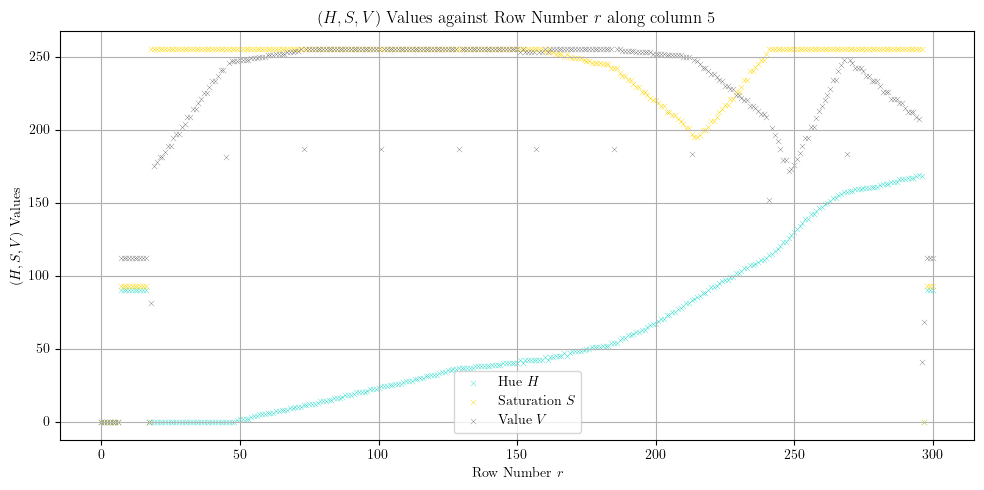

In [7]:
# plot graph of (H, S, V) against r

init_plt('Row Number $r$', '$(H, S, V)$ Values', f'$(H, S, V)$ Values against Row Number $r$ along column {column}')

plt.scatter(r_list, hsv_h_list, label=h_label, color=h_colour, s=marker_size, marker=marker_char, linewidths=line_width)
plt.scatter(r_list, hsv_s_list, label=s_label, color=s_colour, s=marker_size, marker=marker_char, linewidths=line_width)
plt.scatter(r_list, hsv_v_list, label=v_label, color=v_colour, s=marker_size, marker=marker_char, linewidths=line_width)

plt.legend()

plt.savefig('hsv-against-row.png')

In [8]:
plt.close()

### Plot $f_H, f_S, f_V$ against $h$

In [9]:
# setup the initial values for h and r

h_0 = 18
h_1 = 296 + 1
r_len = h_1 - h_0

def r_to_h(r: int) -> float:
    return 1 - ((r - h_0) / (r_len - 1))

h_list: list[float] = [r_to_h(r) for r in r_list] # convert list of r to list of h

h_r_list: list[float] = h_list[h_0:h_1] # extract the values of h within range

hsv_h_r_list: list[int] = hsv_h_list[h_0:h_1] # extract the values of (H, S, V) within range
hsv_s_r_list: list[int] = hsv_s_list[h_0:h_1]
hsv_v_r_list: list[int] = hsv_v_list[h_0:h_1]

h_r_list

[1.0,
 0.9964028776978417,
 0.9928057553956835,
 0.9892086330935251,
 0.9856115107913669,
 0.9820143884892086,
 0.9784172661870504,
 0.9748201438848921,
 0.9712230215827338,
 0.9676258992805755,
 0.9640287769784173,
 0.960431654676259,
 0.9568345323741008,
 0.9532374100719424,
 0.9496402877697842,
 0.9460431654676259,
 0.9424460431654677,
 0.9388489208633094,
 0.935251798561151,
 0.9316546762589928,
 0.9280575539568345,
 0.9244604316546763,
 0.920863309352518,
 0.9172661870503597,
 0.9136690647482014,
 0.9100719424460432,
 0.9064748201438849,
 0.9028776978417266,
 0.8992805755395683,
 0.89568345323741,
 0.8920863309352518,
 0.8884892086330936,
 0.8848920863309353,
 0.8812949640287769,
 0.8776978417266187,
 0.8741007194244604,
 0.8705035971223022,
 0.8669064748201438,
 0.8633093525179856,
 0.8597122302158273,
 0.8561151079136691,
 0.8525179856115108,
 0.8489208633093526,
 0.8453237410071942,
 0.841726618705036,
 0.8381294964028777,
 0.8345323741007195,
 0.8309352517985611,
 0.8273381294

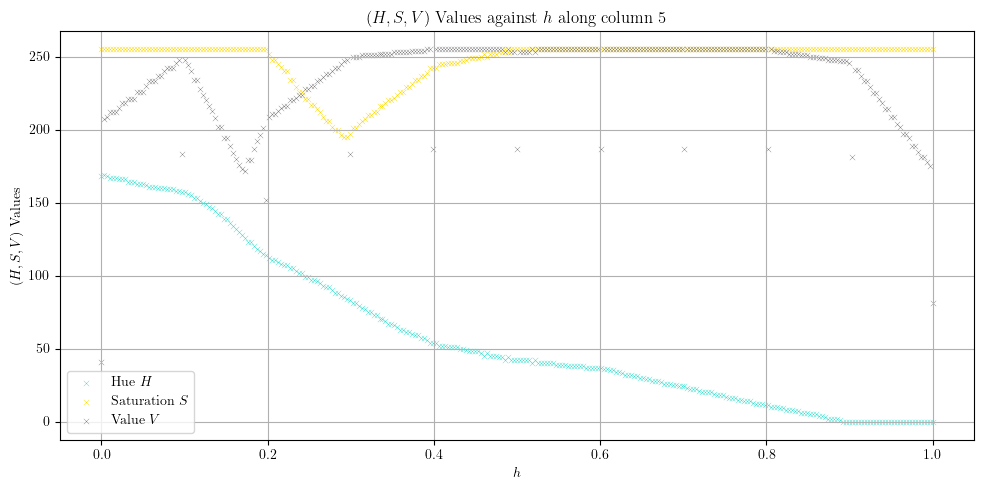

In [10]:
# plot graph of (H, S, V) against h

init_plt('$h$', '$(H, S, V)$ Values', f'$(H, S, V)$ Values against $h$ along column {column}')

plt.scatter(h_r_list, hsv_h_r_list, label=h_label, color=h_colour, s=marker_size, marker=marker_char, linewidth=line_width)
plt.scatter(h_r_list, hsv_s_r_list, label=s_label, color=s_colour, s=marker_size, marker=marker_char, linewidth=line_width)
plt.scatter(h_r_list, hsv_v_r_list, label=v_label, color=v_colour, s=marker_size, marker=marker_char, linewidth=line_width)

plt.legend()

plt.savefig('hsv-against-h.png')

In [11]:
plt.close()

## Regression

### Prepare Lists to do Regression

In [12]:
# normalise values of h, s, v to our desired values

hsv_h_n_list: list[float] = [hsv_h_r_list[i] / 255 * 360 for i in range(279)]
hsv_s_n_list: list[float] = [hsv_s_r_list[i] / 255 * 1 for i in range(279)]
hsv_v_n_list: list[float] = [hsv_v_r_list[i] / 255 * 1 for i in range(279)]

### Regression on $f_H$

In [13]:
# define f_H with unkwnown parameters y_1, y_2 which operates on a list

def f_h_params(xl: list[float], y_1: float, y_2: float) -> list[float]:
    yl: list[float] = [0 for _ in xl]
    for i, x in enumerate(xl):
        if 0 <= x <= 0.1:
            yl[i] =  -150 * x + 237
        elif 0.1 <= x <= 0.6:
            yl[i] = (
                ((222  * (x - 0.3) * (x - 0.4) * (x - 0.6)) / ((0.1 - 0.3) * (0.1 - 0.4) * (0.1 - 0.6))) +
                ((y_1 * (x - 0.1) * (x - 0.4) * (x - 0.6)) / ((0.3 - 0.1) * (0.3 - 0.4) * (0.3 - 0.6))) +
                ((y_2 * (x - 0.1) * (x - 0.3) * (x - 0.6)) / ((0.4 - 0.1) * (0.4 - 0.3) * (0.4 - 0.6))) +
                ((51   * (x - 0.1) * (x - 0.3) * (x - 0.4)) / ((0.6 - 0.1) * (0.6 - 0.3) * (0.6 - 0.4)))
            )
        elif 0.6 <= x <= 0.9:
            yl[i] = -170 * x + 153
        elif 0.9 <= x <= 1:
            yl[i] = 0
        else:
            yl[i] = 0
    return yl

In [14]:
h_init: list[int] = [0, 0] # initial guess to indicate number of paameters

h_params: list[int]

h_params, _ = optimize.curve_fit(f_h_params, h_r_list, hsv_h_n_list, p0=h_init) # optimised parameters

h_params

array([114.81579939,  79.53254095])

In [15]:
def f_h(x) -> list[float]: # this is a partial function which gives in the fitted parameters
    return f_h_params(x, *h_params)

h_p_list: list[float] = [i / 1000 for i in range(0, 1001, 1)] # list to make sure the plotted graph looks quite smooth
hsv_h_fitted_list: list[float] = f_h(h_p_list) # fitted line

In [16]:
line_width = 1.25 # make the markers look a bit thicker

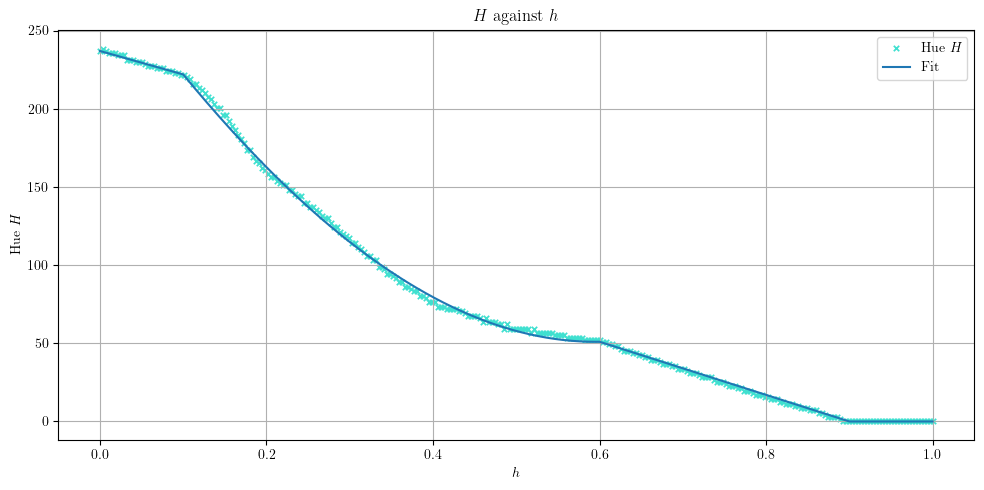

In [17]:
# plot result of fit

init_plt('$h$', h_label, '$H$ against $h$')

plt.scatter(h_r_list, hsv_h_n_list, label=h_label, color=h_colour, s=marker_size, marker=marker_char, linewidth=line_width)
plt.plot(h_p_list, hsv_h_fitted_list, label='Fit')

plt.legend()
plt.savefig('h-against-h.png')

In [18]:
plt.close()

### Regression on $f_S$

In [19]:
# define f_S

def f_s(xl: list[float]) -> list[float]:
    yl: list[float] = [0 for _ in xl]
    for i, x in enumerate(xl):
        if 0 <= x <= 0.2:
            yl[i] = 1
        elif 0.2 <= x <= 0.29:
            yl[i] = -2.611 * x + 1.522
        elif 0.29 <= x <= 0.4:
            yl[i] = 1.682 * x + 0.277
        elif 0.4 <= x <= 0.5:
            yl[i] = 0.5 * x + 0.75
        elif 0.5 <= x <= 1:
            yl[i] = 1
        else:
            yl[i] = 0
    return yl

hsv_s_fitted_list: list[float] = f_s(h_p_list) # fitted line

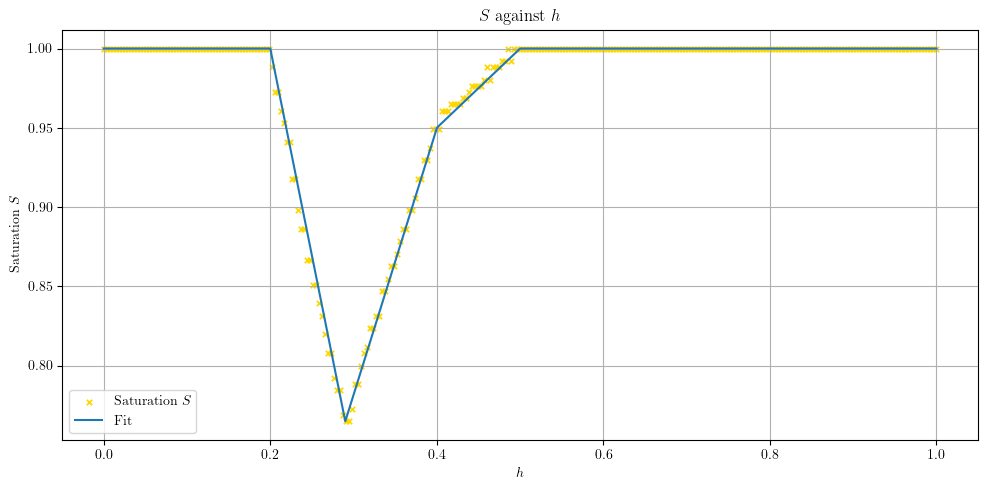

In [20]:
# plot result of fit

init_plt('$h$', s_label, '$S$ against $h$')

plt.scatter(h_r_list, hsv_s_n_list, label=s_label, color=s_colour, s=marker_size, marker=marker_char, linewidth=line_width)
plt.plot(h_p_list, hsv_s_fitted_list, label='Fit')

plt.legend()
plt.savefig('s-against-h.png')

### Regression on $f_V$

In [21]:
# define f_V

def f_v(xl: list[float]) -> list[float]:
    yl: list[float] = [0 for _ in xl]
    for i, x in enumerate(xl):
        if 0 <= x <= 0.1:
            yl[i] = 1.8 * x + 0.8
        elif 0.1 <= x <= 0.172:
            yl[i] = -4.444 * x + 1.424
        elif 0.172 <= x <= 0.2:
            yl[i] = 5.714 * x - 0.323
        elif 0.2 <= x <= 0.3:
            yl[i] = 1.6 * x + 0.5
        elif 0.3 <= x <= 0.4:
            yl[i] = 0.2 * x + 0.92
        elif 0.4 <= x <= 0.8:
            yl[i] = 1
        elif 0.8 <= x <= 0.9:
            yl[i] = -0.3 * x + 1.24
        elif 0.9 <= x <= 1:
            yl[i] = -2.9 * x + 3.58
        else:
            yl[i] = 0
    return yl

hsv_v_fitted_list: list[float] = f_v(h_p_list) # fitted line

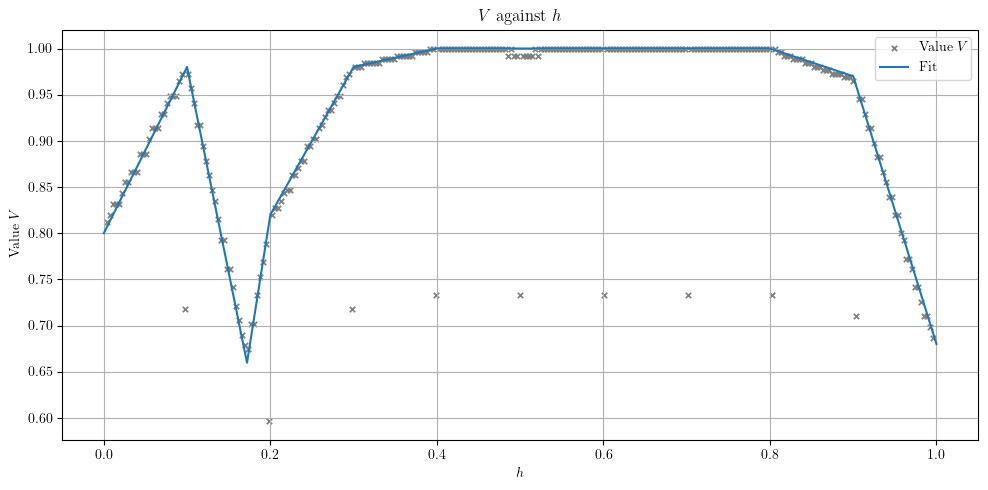

In [22]:
# plot result of fit

init_plt('$h$', v_label, '$V$ against $h$')

plt.scatter(h_r_list[1:r_len - 1], hsv_v_n_list[1:r_len - 1], label=v_label, color=v_colour, s=marker_size, marker=marker_char, linewidth=line_width) # the first and last points are excluded from the plot
plt.plot(h_p_list, hsv_v_fitted_list, label='Fit')

plt.legend()
plt.savefig('v-against-h.png')

## Back-Generate the image

In [23]:
# setup an HSV formatted image and get its pixels

image_generated: Image.Image = Image.new('HSV', (img_width, img_height))
generated_pixels: PyAccess.PyAccess = image_generated.load() # type: ignore

# returns a list of tuples of (H, S, V) for a column

def f(yl: list[int]) -> list[tuple[int, int, int]]:
    hl: list[float] = [r_to_h(y) for y in yl]

    hsv_h: list[float] = f_h(hl)
    hsv_s: list[float] = f_s(hl)
    hsv_v: list[float] = f_v(hl)

    hsv_h_i: list[int] = [int(h / 360 * 255) for h in hsv_h]
    hsv_s_i: list[int] = [int(s * 255) for s in hsv_s]
    hsv_v_i: list[int] = [int(v * 255) for v in hsv_v]

    return [(hsv_h_i[i], hsv_s_i[i], hsv_v_i[i]) for i in yl]

my_pixels: list[list[tuple[int, int, int]]] = [f(list(range(img_height))) for _ in range(img_width)]

# copy this into the generated_pixels reference

for x in range(img_width):
    for y in range(img_height):
        generated_pixels[x, y] = my_pixels[x][y]

# convert to RGB and output

image_generated_rgb: Image.Image = image_generated.convert('RGB')
image_generated_rgb.save('generated-colour.png')